In [0]:
from pyspark.sql import SparkSession

In [0]:
spark=SparkSession.builder.appName("mpg").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

Load the dataframe

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/nivimachinelearning@gmail.com/auto_mpg.csv",inferSchema="True")

In [0]:
df1.printSchema()

root
 |-- mpg: double (nullable = true)
 |-- cyl: integer (nullable = true)
 |-- disp: double (nullable = true)
 |-- hp: string (nullable = true)
 |-- wt: integer (nullable = true)
 |-- acc: double (nullable = true)
 |-- yr: integer (nullable = true)
 |-- origin: integer (nullable = true)
 |-- car name: string (nullable = true)



In [0]:
df1.show(5)

+----+---+-----+---+----+----+---+------+--------------------+
| mpg|cyl| disp| hp|  wt| acc| yr|origin|            car name|
+----+---+-----+---+----+----+---+------+--------------------+
|18.0|  8|307.0|130|3504|12.0| 70|     1|chevrolet chevell...|
|15.0|  8|350.0|165|3693|11.5| 70|     1|   buick skylark 320|
|18.0|  8|318.0|150|3436|11.0| 70|     1|  plymouth satellite|
|16.0|  8|304.0|150|3433|12.0| 70|     1|       amc rebel sst|
|17.0|  8|302.0|140|3449|10.5| 70|     1|         ford torino|
+----+---+-----+---+----+----+---+------+--------------------+
only showing top 5 rows



filter 5 rows where mpg>20 

In [0]:
df1.filter(df1.mpg>20).show(5)

+----+---+-----+---+----+----+---+------+--------------------+
| mpg|cyl| disp| hp|  wt| acc| yr|origin|            car name|
+----+---+-----+---+----+----+---+------+--------------------+
|24.0|  4|113.0| 95|2372|15.0| 70|     3|toyota corona mar...|
|22.0|  6|198.0| 95|2833|15.5| 70|     1|     plymouth duster|
|21.0|  6|200.0| 85|2587|16.0| 70|     1|       ford maverick|
|27.0|  4| 97.0| 88|2130|14.5| 70|     3|        datsun pl510|
|26.0|  4| 97.0| 46|1835|20.5| 70|     2|volkswagen 1131 d...|
+----+---+-----+---+----+----+---+------+--------------------+
only showing top 5 rows



In [0]:
### select the car name and mpg(5 records)
df1.select("car name","mpg").show(5)

+--------------------+----+
|            car name| mpg|
+--------------------+----+
|chevrolet chevell...|18.0|
|   buick skylark 320|15.0|
|  plymouth satellite|18.0|
|       amc rebel sst|16.0|
|         ford torino|17.0|
+--------------------+----+
only showing top 5 rows



In [0]:
### Rename the column mpg with miles_per_gallon
df=df1.withColumnRenamed("mpg","mpg_per_gallon")
df.show(5)

+--------------+---+-----+---+----+----+---+------+--------------------+
|mpg_per_gallon|cyl| disp| hp|  wt| acc| yr|origin|            car name|
+--------------+---+-----+---+----+----+---+------+--------------------+
|          18.0|  8|307.0|130|3504|12.0| 70|     1|chevrolet chevell...|
|          15.0|  8|350.0|165|3693|11.5| 70|     1|   buick skylark 320|
|          18.0|  8|318.0|150|3436|11.0| 70|     1|  plymouth satellite|
|          16.0|  8|304.0|150|3433|12.0| 70|     1|       amc rebel sst|
|          17.0|  8|302.0|140|3449|10.5| 70|     1|         ford torino|
+--------------+---+-----+---+----+----+---+------+--------------------+
only showing top 5 rows



In [0]:
### Calculate average mpg for each cylinders group
df1.groupBy("cyl").agg({"mpg": "avg"}).show(10)

+---+------------------+
|cyl|          avg(mpg)|
+---+------------------+
|  6|19.985714285714284|
|  3|             20.55|
|  5|27.366666666666664|
|  4| 29.28676470588236|
|  8|14.963106796116508|
+---+------------------+



In [0]:
df2=df1.filter(df.hp !="?")


In [0]:
df2.show()

+----+---+-----+---+----+----+---+------+--------------------+
| mpg|cyl| disp| hp|  wt| acc| yr|origin|            car name|
+----+---+-----+---+----+----+---+------+--------------------+
|18.0|  8|307.0|130|3504|12.0| 70|     1|chevrolet chevell...|
|15.0|  8|350.0|165|3693|11.5| 70|     1|   buick skylark 320|
|18.0|  8|318.0|150|3436|11.0| 70|     1|  plymouth satellite|
|16.0|  8|304.0|150|3433|12.0| 70|     1|       amc rebel sst|
|17.0|  8|302.0|140|3449|10.5| 70|     1|         ford torino|
|15.0|  8|429.0|198|4341|10.0| 70|     1|    ford galaxie 500|
|14.0|  8|454.0|220|4354| 9.0| 70|     1|    chevrolet impala|
|14.0|  8|440.0|215|4312| 8.5| 70|     1|   plymouth fury iii|
|14.0|  8|455.0|225|4425|10.0| 70|     1|    pontiac catalina|
|15.0|  8|390.0|190|3850| 8.5| 70|     1|  amc ambassador dpl|
|15.0|  8|383.0|170|3563|10.0| 70|     1| dodge challenger se|
|14.0|  8|340.0|160|3609| 8.0| 70|     1|  plymouth 'cuda 340|
|15.0|  8|400.0|150|3761| 9.5| 70|     1|chevrolet mont

In [0]:
### Sort the dataframe by horsepower in descending order
df2.orderBy(df2.hp.desc()).show(5)


+----+---+-----+---+----+----+---+------+------------+
| mpg|cyl| disp| hp|  wt| acc| yr|origin|    car name|
+----+---+-----+---+----+----+---+------+------------+
|22.0|  4|121.0| 98|2945|14.5| 75|     2| volvo 244dl|
|18.5|  6|250.0| 98|3525|19.0| 77|     1|ford granada|
|24.0|  4|119.0| 97|2545|17.0| 75|     3|  datsun 710|
|18.0|  6|199.0| 97|2774|15.5| 70|     1|  amc hornet|
|18.0|  6|171.0| 97|2984|14.5| 75|     1|  ford pinto|
+----+---+-----+---+----+----+---+------+------------+
only showing top 5 rows



The above gives wrong result

Change the data type of hp to float or int

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

In [0]:
df3 = df1.withColumn("hp",col("hp").cast(IntegerType())).filter(df1.hp != "?")
df3.orderBy(df3.hp.desc()).show(5)

+----+---+-----+---+----+----+---+------+--------------------+
| mpg|cyl| disp| hp|  wt| acc| yr|origin|            car name|
+----+---+-----+---+----+----+---+------+--------------------+
|16.0|  8|400.0|230|4278| 9.5| 73|     1|  pontiac grand prix|
|14.0|  8|455.0|225|3086|10.0| 70|     1|buick estate wago...|
|14.0|  8|455.0|225|4425|10.0| 70|     1|    pontiac catalina|
|12.0|  8|455.0|225|4951|11.0| 73|     1|buick electra 225...|
|14.0|  8|454.0|220|4354| 9.0| 70|     1|    chevrolet impala|
+----+---+-----+---+----+----+---+------+--------------------+
only showing top 5 rows



In [0]:
### Add column mpg to weight ratio (mpg/wt)
df_new_column=df3.withColumn("mpg_to_weight_ratio",df1.mpg/df1.wt)

In [0]:
df_new_column.show(5)

+----+---+-----+---+----+----+---+------+--------------------+--------------------+
| mpg|cyl| disp| hp|  wt| acc| yr|origin|            car name| mpg_to_weight_ratio|
+----+---+-----+---+----+----+---+------+--------------------+--------------------+
|18.0|  8|307.0|130|3504|12.0| 70|     1|chevrolet chevell...|0.005136986301369863|
|15.0|  8|350.0|165|3693|11.5| 70|     1|   buick skylark 320|0.004061738424045491|
|18.0|  8|318.0|150|3436|11.0| 70|     1|  plymouth satellite|0.005238649592549476|
|16.0|  8|304.0|150|3433|12.0| 70|     1|       amc rebel sst| 0.00466064666472473|
|17.0|  8|302.0|140|3449|10.5| 70|     1|         ford torino|0.004928964917367353|
+----+---+-----+---+----+----+---+------+--------------------+--------------------+
only showing top 5 rows



In [0]:
### Remove a column acceleration

df_dropped=df3.drop("acc")
df_dropped.show(5)

+----+---+-----+---+----+---+------+--------------------+
| mpg|cyl| disp| hp|  wt| yr|origin|            car name|
+----+---+-----+---+----+---+------+--------------------+
|18.0|  8|307.0|130|3504| 70|     1|chevrolet chevell...|
|15.0|  8|350.0|165|3693| 70|     1|   buick skylark 320|
|18.0|  8|318.0|150|3436| 70|     1|  plymouth satellite|
|16.0|  8|304.0|150|3433| 70|     1|       amc rebel sst|
|17.0|  8|302.0|140|3449| 70|     1|         ford torino|
+----+---+-----+---+----+---+------+--------------------+
only showing top 5 rows



In [0]:
### drop the duplicates

df_duplicates=df3.dropDuplicates(["car name"])
df_duplicates.show(5)

+----+---+-----+---+----+----+---+------+--------------------+
| mpg|cyl| disp| hp|  wt| acc| yr|origin|            car name|
+----+---+-----+---+----+----+---+------+--------------------+
|24.0|  4|107.0| 90|2430|14.5| 70|     2|         audi 100 ls|
|24.5|  4|151.0| 88|2740|16.0| 77|     1|pontiac sunbird c...|
|32.0|  4|135.0| 84|2295|11.6| 82|     1|       dodge rampage|
|13.0|  8|350.0|145|3988|13.0| 73|     1|    chevrolet malibu|
|15.0|  8|350.0|145|4082|13.0| 73|     1|chevrolet monte c...|
+----+---+-----+---+----+----+---+------+--------------------+
only showing top 5 rows



In [0]:
df=df3.toPandas()
df.sample(15)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
220,17.0,8,260.0,110,4060,19.0,77,1,oldsmobile cutlass supreme
232,24.5,4,151.0,88,2740,16.0,77,1,pontiac sunbird coupe
240,21.5,4,121.0,110,2600,12.8,77,2,bmw 320i
73,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)
369,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l
95,13.0,8,360.0,175,3821,11.0,73,1,amc ambassador brougham
302,37.3,4,91.0,69,2130,14.7,79,2,fiat strada custom
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
89,12.0,8,429.0,198,4952,11.5,73,1,mercury marquis brougham


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=df.drop("car name",axis=1)

In [0]:
df["origin"]=df["origin"].replace({1:"america",2:"europe",3:"asia"})

In [0]:
df.sample(15)

,mpg,cyl,disp,hp,wt,acc,yr,origin
44,18.0,6,258.0,110,2962,13.5,71,america
105,12.0,8,350.0,180,4499,12.5,73,america
356,25.4,6,168.0,116,2900,12.6,81,asia
187,15.5,8,304.0,120,3962,13.9,76,america
54,27.0,4,97.0,60,1834,19.0,71,europe
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
177,22.0,4,121.0,98,2945,14.5,75,europe
0,18.0,8,307.0,130,3504,12.0,70,america
159,16.0,6,250.0,105,3897,18.5,75,america


In [0]:
df.dtypes

Out[32]: mpg       float64
cyl         int32
disp      float64
hp          int32
wt          int32
acc       float64
yr          int32
origin     object
dtype: object

Out[33]: <seaborn.axisgrid.PairGrid at 0x7ff6234f6910>

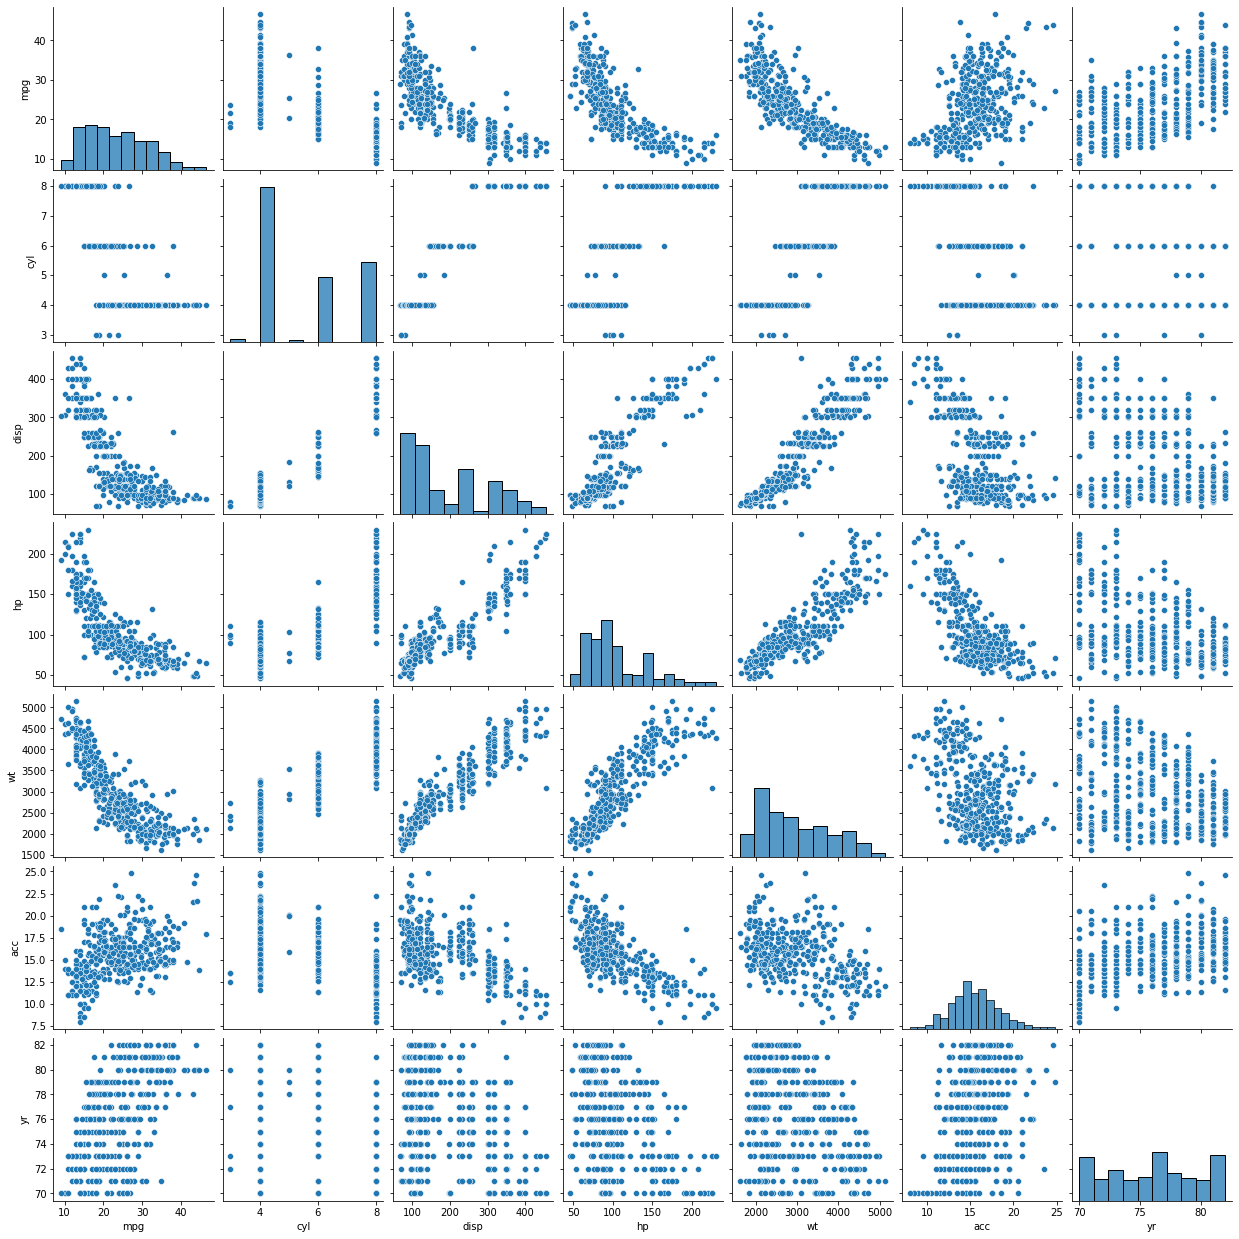

In [0]:
sns.pairplot(df)

In [0]:
import pandas as pd

In [0]:
df=pd.get_dummies(df,columns=["origin"])

In [0]:
X=df.drop("mpg",axis=1)
Y=df[["mpg"]]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [0]:
X_test.shape

Out[46]: (118, 7)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model_lr=LinearRegression()

In [0]:
model_lr.fit(X_train,Y_train)

Out[60]: LinearRegression()

In [0]:
model_lr.score(X_train,Y_train)

Out[61]: 0.8292844894157273

In [0]:
model_lr.score(X_test,Y_test)

Out[62]: 0.8035762763910486